In [1]:
import numpy as np
from ase.io import read, write
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [517]:
# path = '/gpfs/home/smdick/smdick/mbpol/md_siesta_pure/md_siesta_10.traj'
# path = '/gpfs/home/smdick/smdick/new/md_siesta_uftodz_5/md_siesta.traj'
# path = '/gpfs/home/smdick/smdick/new/md_siesta_uftodz_8/md_siesta.traj'
# path = '/gpfs/home/smdick/smdick/new/md_siesta_uftodz_10/md_siesta.traj'
# path = '/gpfs/home/smdick/smdick/new/md_siesta_uftodz_inf/md_siesta.traj'
path = '/gpfs/home/smdick/smdick/mbpol/nose_128_10.traj'
dt = 20
t0 = 8000
tmax = 100000

In [518]:
atoms = read(path, '{}:{}:{}'.format(t0, tmax, dt))

In [519]:
def water_cm(x):
    x = x.reshape(-1,3,3)
    return ((16*x[:,0] + x[:,1] + x[:,2])/18)

In [520]:
drmse_mean = []
for offset in range(0,int(len(atoms)/2),100):
    cm0 = atoms[offset].get_center_of_mass()
    pos0 = atoms[offset].get_positions() - cm0
    pos0 = water_cm(pos0)
#     pos0 = pos0[::3]
    drmse = []
    for a in atoms[offset:offset + int(len(atoms)/2)]:
        pos = water_cm(a.get_positions() - a.get_center_of_mass())
#         pos = (a.get_positions() - a.get_center_of_mass())[::3]
        drmse.append(np.mean(np.sum((pos-pos0)**2, axis = 1)))
    drmse_mean.append(drmse)
t = np.arange(0, int(len(atoms)/2)*dt, dt)/2000
# drmse = np.mean(drmse_mean, axis = 0)
drmse = np.array(drmse_mean)

In [521]:
def lin(x, a, b):
    return a*x + b

In [522]:
D = []
for d in drmse:
    start = 1000
    par = curve_fit(lin, t[start:], d[start:])[0]
    D.append(par[0]/6)

In [523]:
np.mean(D)

0.23985129527252005

In [524]:
np.std(D)/np.sqrt(len(D)-1)

0.008650753699063717

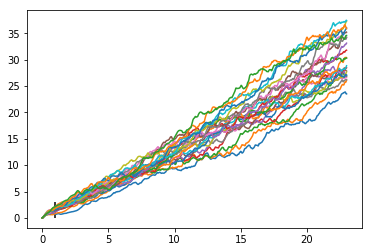

In [525]:
plot(t, drmse.T)
start = 100
# par = curve_fit(lin, t[start:], drmse[start:])[0]
vlines(t[start], 0, 3)
# plot(t, lin(t, *par))

In [526]:
par[0]/6

0.25389663448203054

In [168]:
np.sqrt(curve_fit(lin, t, drmse)[1])

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.00445975,        nan],
       [       nan, 0.01014003]])